<a href="https://colab.research.google.com/github/GGlivePh/PLF/blob/main/selras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the data
data1 = pd.read_excel('all_phenotype_data_cleaned.xlsx')
# Drop rows with NaN values in 'fillet_wt_g' or 'Weight_g' at the start
data1 = data1.dropna(subset=['fillet_wt_g', 'Weight_g'])
# 2. Extract month from UID and create 'month' column
data1['month'] = data1['UID'].str.split('-').str[1].astype(int)

# 3. Create 'Batch' column based on 'month'
data1['Batch'] = 0
data1.loc[data1['month'] == 10, 'Batch'] = 1
data1.loc[(data1['month'] == 11) | (data1['month'] == 1), 'Batch'] = 2

# 4. Define features and target variable
features = ['Weight_g', 'Length_mm', 'Width_mm', 'Height_mm']
target = 'fillet_wt_g'

# 5. Create train-test split based on 'Batch'
X_train = data1[data1['Batch'] == 1][features]
y_train = data1[data1['Batch'] == 1][target]
X_test = data1[data1['Batch'] == 2][features]
y_test = data1[data1['Batch'] == 2][target]

# 6. (Optional) Check the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# 7. Proceed with model training and evaluation
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

X_train shape: (364, 4)
y_train shape: (364,)
X_test shape: (403, 4)
y_test shape: (403,)

Model Evaluation:
Mean Squared Error: 1746.1486
R-squared: 0.9762


In [1]:
!git clone https://github.com/GGlivePh/PLF.git

Cloning into 'PLF'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 61 (delta 26), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (61/61), 6.45 MiB | 3.38 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [2]:
import os
os.chdir('PLF')

In [4]:
import os
import pandas as pd

In [23]:
# Use pd.read_excel to read the Excel file
data1 = pd.read_excel('all_phenotype_data_cleaned.xlsx')

In [24]:
data1

,UID,Weight_g,Length_mm,Width_mm,Height_mm,Lpic✔,Dpic✔,Rpic✔,Vpic✔,Tissue✔,boxID,sex (F/M),Viscera_wt,fillet_wt_g,OBS,Notes
0,2024-10-07_0001,1200.0,44.5,62.5,95.6,NaN,NaN,NaN,NaN,NaN,1,M,101.2,761.1,TORSTEN,NaN
1,2024-10-07_0002,1400.0,46.0,64.9,95.0,NaN,NaN,NaN,NaN,NaN,1,F,152.0,918.0,OKSANA,NaN
2,2024-10-07_0003,1370.0,45.5,71.0,100.5,NaN,NaN,NaN,NaN,NaN,1,M,106.7,878.7,TORSTEN,BAD TAIL/ BENT
3,2024-10-07_0004,1673.0,48.7,80.0,110.0,NaN,NaN,NaN,NaN,NaN,1,M,196.0,1058.0,OKSANA,NaN
4,2024-10-07_0005,1436.0,47.5,80.0,100.4,NaN,NaN,NaN,NaN,NaN,1,F,129.2,917.7,TORSTEN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,2025-01-14_0096,1510.0,47.5,73.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,M,150.0,995.2,T,DEF
770,2025-01-14_0097,1236.0,41.2,65.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,F,134.0,724.0,S,DEF
771,2025-01-14_0098,1161.0,43.0,61.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,M,133.6,740.4,T,DEF
772,2025-01-14_0099,1085.0,43.5,60.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,F,143.0,672.1,T,DEF


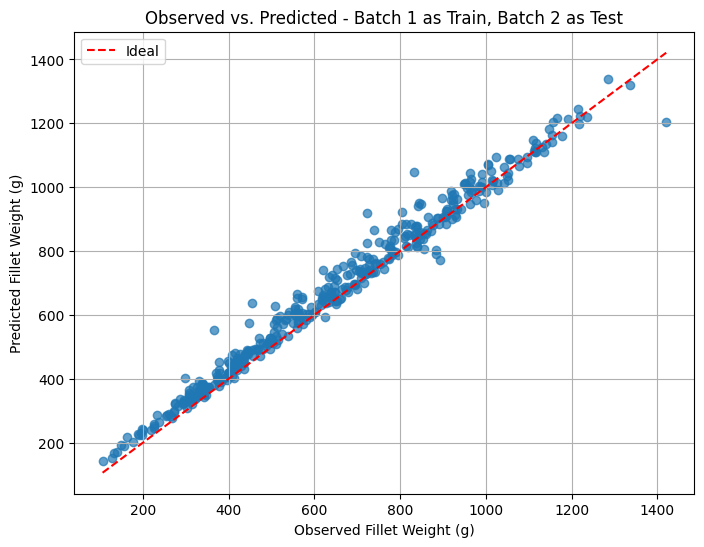

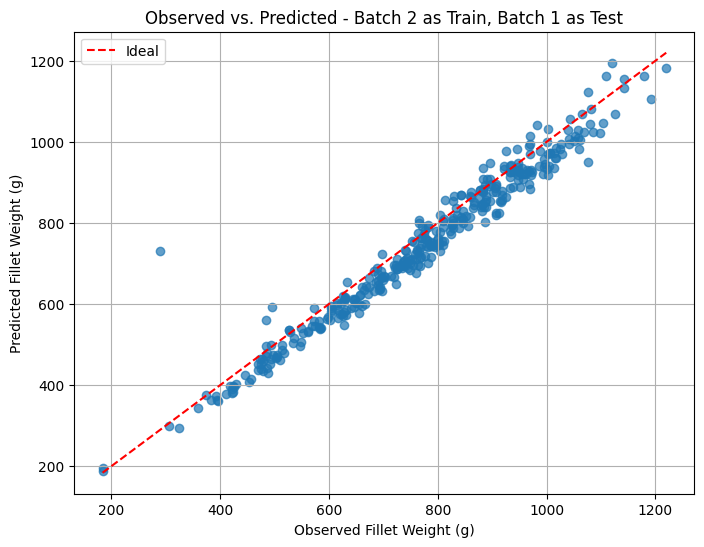


Average Model Evaluation:
Average RMSE: 46.6630
Average R-squared: 0.9558


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# 1. Load the data
data1 = pd.read_excel('all_phenotype_data_cleaned.xlsx')
# Drop rows with NaN values in 'fillet_wt_g' or 'Weight_g' at the start
data1 = data1.dropna(subset=['fillet_wt_g', 'Weight_g'])
# 2. Extract month from UID and create 'month' column
data1['month'] = data1['UID'].str.split('-').str[1].astype(int)

# 3. Create 'Batch' column based on 'month'
data1['Batch'] = 0
data1.loc[data1['month'] == 10, 'Batch'] = 1
data1.loc[(data1['month'] == 11) | (data1['month'] == 1), 'Batch'] = 2

# 4. Define features and target variable
#features = ['Weight_g', 'Length_mm', 'Width_mm', 'Height_mm']
features = ['Weight_g']
target = 'fillet_wt_g'

# Initialize lists to store evaluation metrics
rmse_scores = []  # Initialize rmse_scores to store RMSE values
r2_scores = []

# Iterate through two scenarios (Batch 1 as train, Batch 2 as test, and vice versa)
for batch_train, batch_test in [(1, 2), (2, 1)]:
    # 5. Create train-test split based on 'Batch'
    X_train = data1[data1['Batch'] == batch_train][features]
    y_train = data1[data1['Batch'] == batch_train][target]
    X_test = data1[data1['Batch'] == batch_test][features]
    y_test = data1[data1['Batch'] == batch_test][target]

    # *** Handle NaN values using imputation ***
    imputer = SimpleImputer(strategy='mean')  # Create an imputer to replace NaNs with the mean
    X_train = imputer.fit_transform(X_train)  # Fit and transform on training data
    X_test = imputer.transform(X_test)  # Transform test data using the trained imputer

    # 7. Proceed with model training and evaluation
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model and store scores
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)  # Append rmse to rmse_scores list
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Evaluate the model for Scenario 2
    # Plot observed vs. predicted values for this scenario
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)  # Scatter plot
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal')  # Line of perfect prediction
    plt.xlabel("Observed Fillet Weight (g)")
    plt.ylabel("Predicted Fillet Weight (g)")
    plt.title(f"Observed vs. Predicted - Batch {batch_train} as Train, Batch {batch_test} as Test")
    plt.legend()
    plt.grid(True)
    plt.show()



# Calculate and print average performance
avg_rmse = sum(rmse_scores) / len(rmse_scores)  # Calculate average RMSE from rmse_scores list
avg_r2 = sum(r2_scores) / len(r2_scores)

print("\nAverage Model Evaluation:")
print(f"Average RMSE: {avg_rmse:.4f}")
print(f"Average R-squared: {avg_r2:.4f}")


Number of records in Batch 1: 364
Number of records in Batch 2: 403

Model Evaluation for Batch 1 as Train, Batch 2 as Test:
RMSE: 46.6410
R-squared: 0.9704


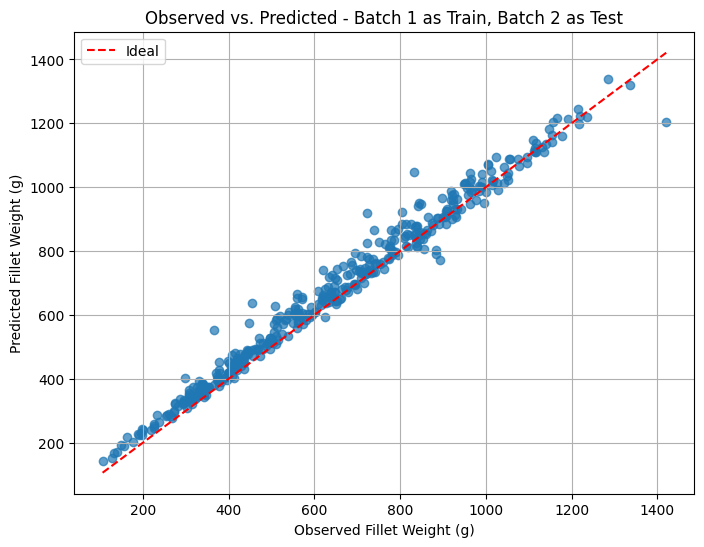


Model Evaluation for Batch 2 as Train, Batch 1 as Test:
RMSE: 46.6849
R-squared: 0.9413


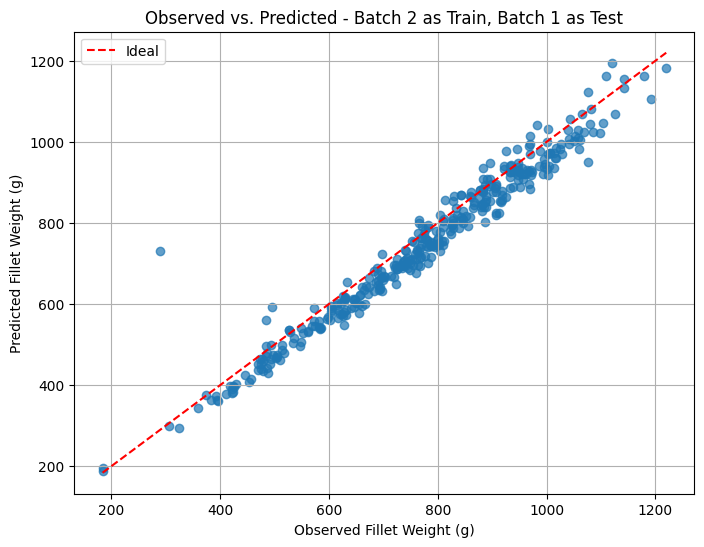


Average Model Evaluation:
Average RMSE: 46.6630
Average R-squared: 0.9558


In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# 1. Load the data
data1 = pd.read_excel('all_phenotype_data_cleaned.xlsx')
# Drop rows with NaN values in 'fillet_wt_g' or 'Weight_g' at the start
data1 = data1.dropna(subset=['fillet_wt_g', 'Weight_g'])
# 2. Extract month from UID and create 'month' column
data1['month'] = data1['UID'].str.split('-').str[1].astype(int)

# 3. Create 'Batch' column based on 'month'
data1['Batch'] = 0
data1.loc[data1['month'] == 10, 'Batch'] = 1
data1.loc[(data1['month'] == 11) | (data1['month'] == 1), 'Batch'] = 2

# Count records in each batch
batch1_count = data1[data1['Batch'] == 1].shape[0]
batch2_count = data1[data1['Batch'] == 2].shape[0]

print(f"\nNumber of records in Batch 1: {batch1_count}")
print(f"Number of records in Batch 2: {batch2_count}")

# 4. Define features and target variable
#features = ['Weight_g', 'Length_mm', 'Width_mm', 'Height_mm']
features = ['Weight_g']
target = 'fillet_wt_g'

# Initialize lists to store evaluation metrics
rmse_scores = []  # Initialize rmse_scores to store RMSE values
r2_scores = []

# Iterate through two scenarios (Batch 1 as train, Batch 2 as test, and vice versa)
for batch_train, batch_test in [(1, 2), (2, 1)]:
    # 5. Create train-test split based on 'Batch'
    X_train = data1[data1['Batch'] == batch_train][features]
    y_train = data1[data1['Batch'] == batch_train][target]
    X_test = data1[data1['Batch'] == batch_test][features]
    y_test = data1[data1['Batch'] == batch_test][target]

    # *** Handle NaN values using imputation ***
    imputer = SimpleImputer(strategy='mean')  # Create an imputer to replace NaNs with the mean
    X_train = imputer.fit_transform(X_train)  # Fit and transform on training data
    X_test = imputer.transform(X_test)  # Transform test data using the trained imputer

    # 7. Proceed with model training and evaluation
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model and store scores
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)  # Append rmse to rmse_scores list
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Print evaluation metrics for the current batch
    print(f"\nModel Evaluation for Batch {batch_train} as Train, Batch {batch_test} as Test:")
    print(f"RMSE: {rmse:.4f}")
    print(f"R-squared: {r2:.4f}")

    # Plot observed vs. predicted values for this scenario
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)  # Scatter plot
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal')  # Line of perfect prediction
    plt.xlabel("Observed Fillet Weight (g)")
    plt.ylabel("Predicted Fillet Weight (g)")
    plt.title(f"Observed vs. Predicted - Batch {batch_train} as Train, Batch {batch_test} as Test")
    plt.legend()
    plt.grid(True)
    plt.show()


# Calculate and print average performance
avg_rmse = sum(rmse_scores) / len(rmse_scores)  # Calculate average RMSE from rmse_scores list
avg_r2 = sum(r2_scores) / len(r2_scores)

print("\nAverage Model Evaluation:")
print(f"Average RMSE: {avg_rmse:.4f}")
print(f"Average R-squared: {avg_r2:.4f}")


In [14]:
# Check the size of the training data
print(f"Size of X_train_batch2: {X_train_batch2.shape}")
print(f"Size of y_train_batch2: {y_train_batch2.shape}")
print(f"Number of samples in Batch 2: {len(data1[data1['Batch'] == 2])}")

Size of X_train_batch2: (0, 14)
Size of y_train_batch2: (0,)
Number of samples in Batch 2: 0


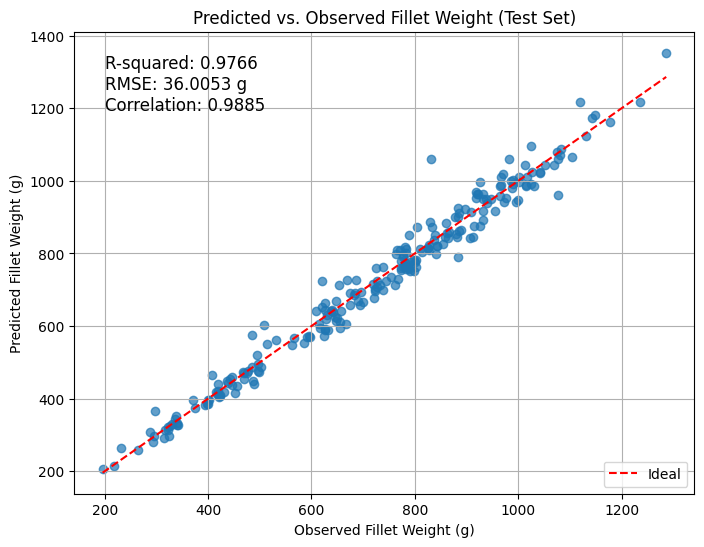

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Drop rows with NaN values in 'fillet_wt_g' or 'Weight_g' at the start
data1 = data1.dropna(subset=['fillet_wt_g', 'Weight_g'])

# Prepare the data for Scenario 2
# (Using Weight_g, Height_mm, Width_mm for a more interesting plot)
X2 = data1[['Weight_g', 'Height_mm', 'Width_mm']]
y2 = data1['fillet_wt_g']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Train the model for Scenario 2
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y_pred2 = model2.predict(X2_test)

# Evaluate the model for Scenario 2
r2_2 = r2_score(y2_test, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y2_test, y_pred2))
correlation_2 = np.corrcoef(y2_test, y_pred2)[0, 1]

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(y2_test, y_pred2, alpha=0.7)  # Scatter plot of observed vs. predicted
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], 'r--', label='Ideal') # Line of perfect prediction

# Annotations
annotation_text = f'R-squared: {r2_2:.4f}\nRMSE: {rmse_2:.4f} g\nCorrelation: {correlation_2:.4f}'
plt.text(0.05, 0.95, annotation_text, transform=plt.gca().transAxes, fontsize=12, va='top')

# Labels and title
plt.xlabel('Observed Fillet Weight (g)')
plt.ylabel('Predicted Fillet Weight (g)')
plt.title('Predicted vs. Observed Fillet Weight (Test Set)')
plt.legend()
plt.grid(True)
plt.show()

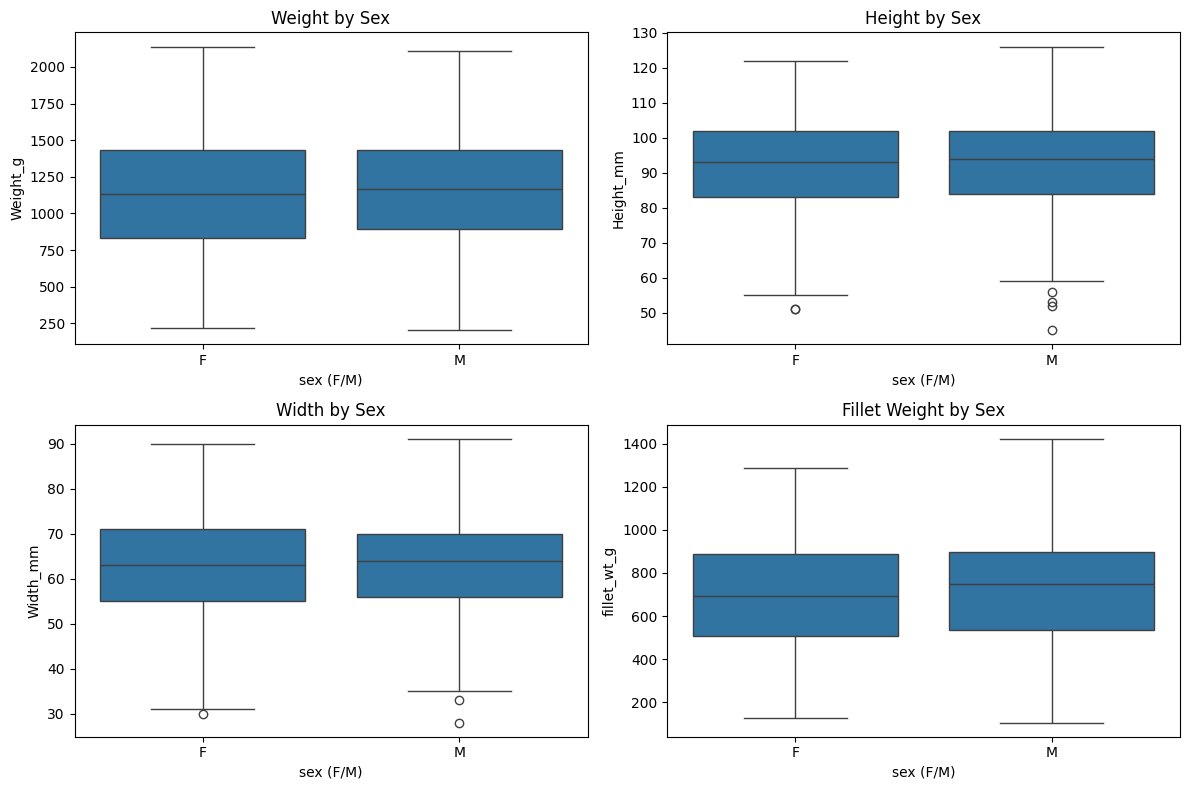

In [ ]:
# prompt: Using dataframe data1: visualize sex differences in weight, height, width and fillet in an aggregated figure with sub plots)?

import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot Weight_g
sns.boxplot(ax=axes[0, 0], x='sex (F/M)', y='Weight_g', data=data1)
axes[0, 0].set_title('Weight by Sex')

# Plot Height_mm
sns.boxplot(ax=axes[0, 1], x='sex (F/M)', y='Height_mm', data=data1)
axes[0, 1].set_title('Height by Sex')

# Plot Width_mm
sns.boxplot(ax=axes[1, 0], x='sex (F/M)', y='Width_mm', data=data1)
axes[1, 0].set_title('Width by Sex')

# Plot fillet_wt_g
sns.boxplot(ax=axes[1, 1], x='sex (F/M)', y='fillet_wt_g', data=data1)
axes[1, 1].set_title('Fillet Weight by Sex')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


Class Distribution Before Split:
sex (F/M)
M    0.62141
F    0.37859
Name: proportion, dtype: float64

Class Distribution in Training Set:
sex (F/M)
M    0.621269
F    0.378731
Name: proportion, dtype: float64

Class Distribution in Test Set:
sex (F/M)
M    0.621739
F    0.378261
Name: proportion, dtype: float64
Classification Metrics (Test Set):
Accuracy: 0.5304
Precision: 0.6144
Recall: 0.6573
F1-Score: 0.6351


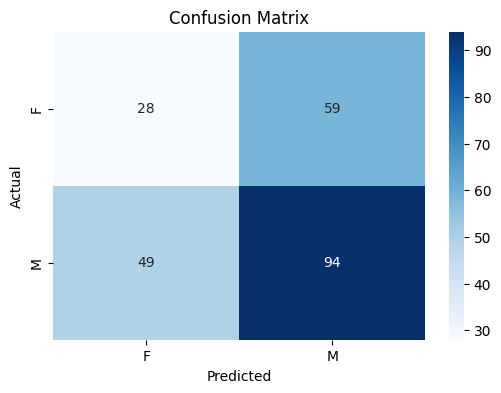

In [ ]:
!pip install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with NaN values in the relevant columns
data1 = data1.dropna(subset=['sex (F/M)', 'Weight_g', 'Length_mm', 'Width_mm', 'Height_mm'])

# Prepare the data
X = data1[['Weight_g', 'Length_mm', 'Width_mm', 'Height_mm']]
y = data1['sex (F/M)']

# Check class distribution before split
print("Class Distribution Before Split:")
print(y.value_counts(normalize=True))

# Split data using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check class distribution after split
print("\nClass Distribution in Training Set:")
print(y_train.value_counts(normalize=True))
print("\nClass Distribution in Test Set:")
print(y_test.value_counts(normalize=True))

# Create and train the Random Forest model
model = RandomForestClassifier(random_state=42)  # Create the RandomForestClassifier

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')

print("Classification Metrics (Test Set):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

# Create heatmap using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax,
            xticklabels=['F', 'M'], yticklabels=['F', 'M'])  # Use explicit labels

# Set axis labels and title
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")

# Show the plot
plt.show()

In [ ]:
# prompt: Using dataframe data1: plot weight versus fillet

import altair as alt

# Create the scatter plot
alt.Chart(data1).mark_point().encode(
    x='Weight_g',
    y='fillet_wt_g'
).interactive()


alt.Chart(...)

In [ ]:
# prompt: Using dataframe data1: very good code. now i want to come up with the right threshold interms of the difference between fillet and weight. try finding ways to find that treshold from the data and use it to scan if there are other issues. no not with the IQR. just find the most frequent diff between weight and fillet like if in most cases if fillet is 80% or 95% or 89% of live weight

import pandas as pd

# Calculate the fillet to weight ratio
data1['fillet_ratio'] = data1['fillet_wt_g'] / data1['Weight_g']

# Find the most frequent fillet ratio
most_frequent_ratio = data1['fillet_ratio'].mode()[0]

# Print the most frequent ratio
print(f"The most frequent fillet to weight ratio is: {most_frequent_ratio:.2f}")

# Set a threshold based on the most frequent ratio (e.g., within 5%)
threshold = 0.05
lower_bound = most_frequent_ratio - threshold
upper_bound = most_frequent_ratio + threshold

# Identify potential issues based on the threshold
data1['potential_issue'] = ((data1['fillet_ratio'] < lower_bound) | (data1['fillet_ratio'] > upper_bound))

# Display rows with potential issues
print("\nRows with potential issues:")
print(data1[data1['potential_issue']])


The most frequent fillet to weight ratio is: 0.63

Rows with potential issues:
                 UID  Weight_g  Length_mm  Width_mm  Height_mm  Lpic✔   Dpic✔  \
23   2024-10-07_0024    1548.0       49.5      79.0      110.0     NaN    NaN   
54   2024-10-07_0055     955.0       44.1      61.0       84.0     NaN    NaN   
68   2024-10-08_0008     909.0       41.0      59.0       84.0     NaN    NaN   
82   2024-10-08_0022     926.0       43.9      62.0       84.0     NaN    NaN   
119  2024-10-08_0059    1199.0       44.0      66.0       99.0     NaN    NaN   
..               ...       ...        ...       ...        ...     ...    ...   
674  2025-01-14_0001    1670.0       44.3      81.0      103.0     NaN    NaN   
722  2025-01-14_0049     906.0       40.2      61.0       87.0     NaN    NaN   
732  2025-01-14_0059    1918.0       51.4      81.0      115.0     NaN    NaN   
746  2025-01-14_0073    1255.0       43.5      65.0       98.0     NaN    NaN   
748  2025-01-14_0075    1225.0

<ipython-input-13-88663e0cd85c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data1, x='Length_mm', y='sex (F/M)', inner='box', palette='Dark2')


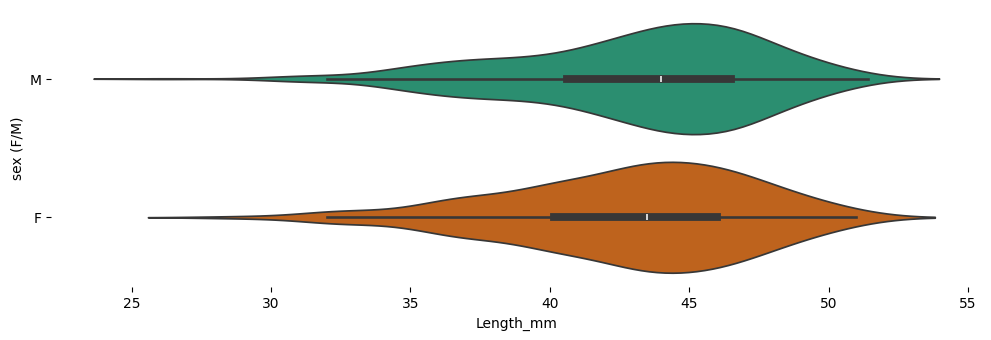

In [ ]:
# @title sex (F/M) vs Length_mm

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data1['sex (F/M)'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data1, x='Length_mm', y='sex (F/M)', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# prompt: plot relationship between weight and fillet making sure the x and y axis tick intervals are the same. Use the right column names in data1 (weight_g ....

# @title weight_g vs Fillet_g
figsize = (12, 1.2 * len(data1['weight_g'].unique()))
plt.figure(figsize=figsize)
ax = sns.scatterplot(data=data1, x='weight_g', y='Fillet_g')

# Find the maximum value for both x and y axes
max_val = max(data1['weight_g'].max(), data1['Fillet_g'].max())

# Set the same tick intervals for x and y axes
ax.set_xticks(range(0, int(max_val) + 1, 50)) #Example tick interval is 50, adjust as needed
ax.set_yticks(range(0, int(max_val) + 1, 50))

plt.show()


KeyError: 'weight_g'

In [ ]:
# prompt: Using dataframe data1: plot fillet versus weight

import altair as alt

# Create a scatter plot of fillet_wt_g versus Weight_g
chart = alt.Chart(data1).mark_point().encode(
    x='Weight_g',
    y='fillet_wt_g'
)

chart

alt.Chart(...)

<ipython-input-9-5e65321509a7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data1, x='Weight_g', y='sex (F/M)', inner='box', palette='Dark2')


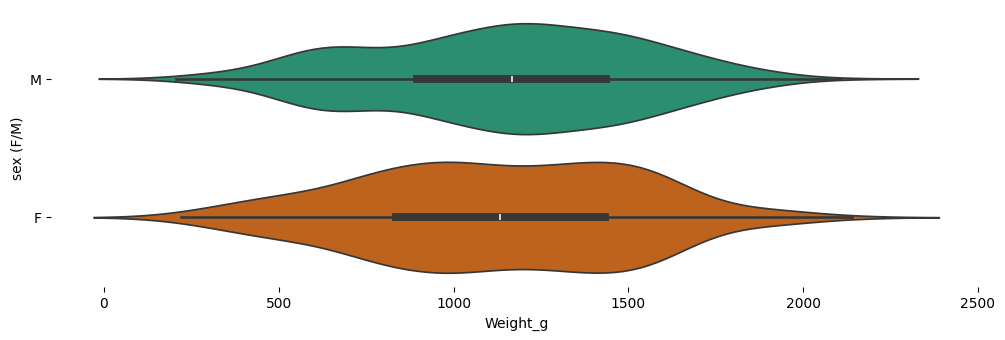

In [ ]:
# @title sex (F/M) vs Weight_g

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data1['sex (F/M)'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data1, x='Weight_g', y='sex (F/M)', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

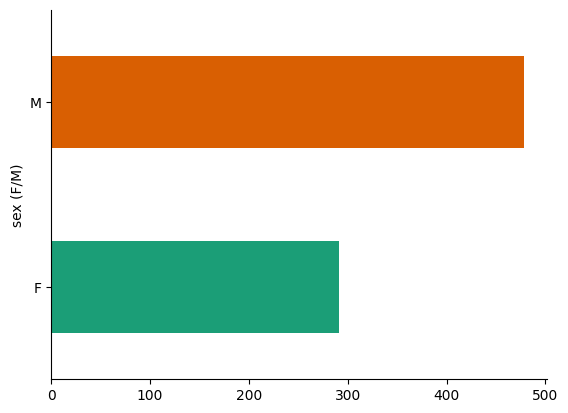

In [ ]:
# @title sex (F/M)

from matplotlib import pyplot as plt
import seaborn as sns
data1.groupby('sex (F/M)').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

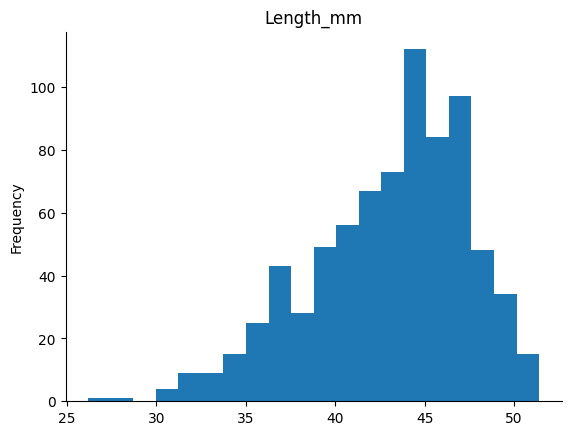

In [ ]:
# @title Length_mm

from matplotlib import pyplot as plt
data1['Length_mm'].plot(kind='hist', bins=20, title='Length_mm')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import os
import pandas as pd
import numpy as np
from google.colab import files
!git clone https://github.com/GGlivePh/PLF.git
os.chdir('PLF')
# Use pd.read_excel to read the Excel file
data1 = pd.read_excel('all_phenotype_data.xlsx')


def detect_outliers(data, columns, method='iqr', threshold=1.5):
    """
    Detects outliers in the specified columns of a DataFrame using the specified method.

    Args:
        data: pandas DataFrame containing the data.
        columns: List of columns to check for outliers.
        method: Outlier detection method ('iqr' or 'zscore'). Defaults to 'iqr'.
        threshold: Threshold for outlier detection. Defaults to 1.5.

    Returns:
        DataFrame with a new column 'is_outlier' indicating if a record is an outlier
        and a column 'outlier_variable' specifying the variable suspected to be an outlier.
    """

    data['is_outlier'] = False  # Initialize outlier column
    data['outlier_variable'] = ''  # Initialize outlier variable column

    for col in columns:
        if method == 'iqr':
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            # Assign the column name to outlier_variable for each outlier
            data.loc[(data[col] < lower_bound) | (data[col] > upper_bound), 'is_outlier'] = True
            data.loc[(data[col] < lower_bound) | (data[col] > upper_bound), 'outlier_variable'] = col
        elif method == 'zscore':
            z_scores = np.abs((data[col] - data[col].mean()) / data[col].std())
            data.loc[z_scores > threshold, 'is_outlier'] = True
            data.loc[z_scores > threshold, 'outlier_variable'] = col

        # Report outliers for the current column
        outliers = data[data['is_outlier'] == True][col]
        if len(outliers) > 0:
            print(f"Column '{col}' has {len(outliers)} potential outliers:")
            #print(outliers) # Uncomment to print the outlier values
            print("-" * 20)

    return data


# Columns to check for outliers
columns_to_check = ['Weight_g', 'Length_mm', 'Width_mm', 'Height_mm', 'Viscera_wt', 'fillet_wt_g']

# Detect outliers using IQR method
data_with_outliers = detect_outliers(data1, columns_to_check, method='iqr')

# Detect outliers using Z-score method (optional)
# data_with_outliers_zscore = detect_outliers(data1, columns_to_check, method='zscore', threshold=3)
# Detect outliers using IQR method
data_with_outliers = detect_outliers(data1, columns_to_check, method='iqr')

# Create a new DataFrame with only the outliers
outliers_df = data_with_outliers[data_with_outliers['is_outlier'] == True]

# Save the DataFrame with outliers to an Excel file
outliers_df.to_excel('outliers_data.xlsx', index=False)

# Download the file
files.download('outliers_data.xlsx')

Cloning into 'PLF'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 40 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 6.10 MiB | 7.09 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Column 'Length_mm' has 7 potential outliers:
--------------------
Column 'Width_mm' has 9 potential outliers:
--------------------
Column 'Height_mm' has 11 potential outliers:
--------------------
Column 'Viscera_wt' has 14 potential outliers:
--------------------
Column 'fillet_wt_g' has 16 potential outliers:
--------------------
Column 'Length_mm' has 7 potential outliers:
--------------------
Column 'Width_mm' has 9 potential outliers:
--------------------
Column 'Height_mm' has 11 potential outliers:
--------------------
Column 'Viscera_wt' has 14 potential outliers:
--------------------
Column 'fillet_wt_g' has 16 potential outliers:
--------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: add small code which also flags records where Fillet_wt_g is more than Weight_g and where Viscera_wt is greater than Fillet_wt_g and include them in the flagged list along with a note on the "outlier_variable" column

import os
import pandas as pd
import numpy as np
from google.colab import files
!git clone https://github.com/GGlivePh/PLF.git
os.chdir('PLF')
# Use pd.read_excel to read the Excel file
data1 = pd.read_excel('all_phenotype_data.xlsx')


def detect_outliers(data, columns, method='iqr', threshold=1.5):
    """
    Detects outliers in the specified columns of a DataFrame using the specified method.

    Args:
        data: pandas DataFrame containing the data.
        columns: List of columns to check for outliers.
        method: Outlier detection method ('iqr' or 'zscore'). Defaults to 'iqr'.
        threshold: Threshold for outlier detection. Defaults to 1.5.

    Returns:
        DataFrame with a new column 'is_outlier' indicating if a record is an outlier
        and a column 'outlier_variable' specifying the variable suspected to be an outlier.
    """

    data['is_outlier'] = False  # Initialize outlier column
    data['outlier_variable'] = ''  # Initialize outlier variable column

    for col in columns:
        if method == 'iqr':
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            # Assign the column name to outlier_variable for each outlier
            data.loc[(data[col] < lower_bound) | (data[col] > upper_bound), 'is_outlier'] = True
            data.loc[(data[col] < lower_bound) | (data[col] > upper_bound), 'outlier_variable'] = col
        elif method == 'zscore':
            z_scores = np.abs((data[col] - data[col].mean()) / data[col].std())
            data.loc[z_scores > threshold, 'is_outlier'] = True
            data.loc[z_scores > threshold, 'outlier_variable'] = col

        # Report outliers for the current column
        outliers = data[data['is_outlier'] == True][col]
        if len(outliers) > 0:
            print(f"Column '{col}' has {len(outliers)} potential outliers:")
            #print(outliers) # Uncomment to print the outlier values
            print("-" * 20)

    # Additional checks
    data.loc[data['fillet_wt_g'] > data['Weight_g'], 'is_outlier'] = True
    data.loc[data['fillet_wt_g'] > data['Weight_g'], 'outlier_variable'] = 'Fillet_wt_g > Weight_g'

    data.loc[data['Viscera_wt'] > data['fillet_wt_g'], 'is_outlier'] = True
    data.loc[data['Viscera_wt'] > data['fillet_wt_g'], 'outlier_variable'] = 'Viscera_wt > Fillet_wt_g'

    return data
# Assuming your data is in a DataFrame called 'data1'
# Replace 'data1' with your actual DataFrame name if different

# Columns to check for outliers
columns_to_check = ['Weight_g', 'Length_mm', 'Width_mm', 'Height_mm', 'Viscera_wt', 'fillet_wt_g']

# Detect outliers using IQR method
data_with_outliers = detect_outliers(data1, columns_to_check, method='iqr')

# Detect outliers using Z-score method (optional)
# data_with_outliers_zscore = detect_outliers(data1, columns_to_check, method='zscore', threshold=3)
# Detect outliers using IQR method
data_with_outliers = detect_outliers(data1, columns_to_check, method='iqr')

# Create a new DataFrame with only the outliers
outliers_df = data_with_outliers[data_with_outliers['is_outlier'] == True]

# Save the DataFrame with outliers to an Excel file
outliers_df.to_excel('outliers_data.xlsx', index=False)

# Download the file
files.download('outliers_data.xlsx')


Cloning into 'PLF'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 43 (delta 15), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (43/43), 6.11 MiB | 7.09 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Column 'Length_mm' has 7 potential outliers:
--------------------
Column 'Width_mm' has 9 potential outliers:
--------------------
Column 'Height_mm' has 11 potential outliers:
--------------------
Column 'Viscera_wt' has 14 potential outliers:
--------------------
Column 'fillet_wt_g' has 16 potential outliers:
--------------------
Column 'Length_mm' has 7 potential outliers:
--------------------
Column 'Width_mm' has 9 potential outliers:
--------------------
Column 'Height_mm' has 11 potential outliers:
--------------------
Column 'Viscera_wt' has 14 potential outliers:
--------------------
Column 'fillet_wt_g' has 16 potential outliers:
--------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>